<a href="https://colab.research.google.com/github/MegaDewi2/-Time-Series-and-Forecasting-Prediksi-jumlah-kasus-Covid-19-di-Jawa-Timur/blob/main/Rev3_Submission_1_ML_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [ ]:

#memasukan library umum yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#melihat isi dari folder dataset yang diambil dari drive

os.chdir('/content/drive/MyDrive/dataset')
!ls -a

'Alzheimer_s Dataset'			  data.csv		  flower
 book					  facemask		  seg_train
 cell_images				  fake_new_dataset.xlsx   TEST
 covid_19_indonesia_time_series_all.csv   fake_or_real_news.csv   TRAIN


In [ ]:
#Load dataset dengan menggunakan fugsi read_csv dari library pandas dan menampilkan dataset dengan memanggil 'df'

df = pd.read_csv('/content/drive/MyDrive/dataset/covid_19_indonesia_time_series_all.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,1783,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,47.05,4722.89,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,1327,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,105.23,6595.29,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,5576,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,130.09,10087.43,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,2490,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,41.50,3790.30,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [ ]:
#melihat informasi mengenai setiap kolom pada dataset dengan fungsi info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
#Menghapus fitur-fitur yang tidak dibutuhkan dengan fungsi drop() dan menggunakan fungsi fillna() untuk mengisi nilai yang kosong. Menyimpan dataset baru dalam variabel 'data' dan menampilkan 5 data teratas dengan fungsi head

data = df.drop(['City or Regency','Name','Item','Kind','Hidden','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)
data = data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,1/8/2020,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,1/9/2020,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,1/10/2020,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,1/11/2020,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,1/12/2020,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
#Menamai ulang nama-nama kolom agar mudah digunakan

data = data.rename(columns={'Date': 'date', 'Location' : 'location', 'New Cases':'new_cases', 'New Deaths':'new_deaths', 'New Recovered': 'new_recovered', 'New Active Cases': 'new_active_cases', 'Total Cases': 'total_cases', 'Total Deaths' : 'total_deaths', 'Total Recovered' : 'total_recovered', 'Total Active Cases' : 'total_active_cases', 'Location Level' : 'location_level', 'Area (km2)' : 'Area_km2', 'Population' : 'population', 'Population Density' : 'population_density', 'Longitude' : 'longitude', 'Latitude' : 'latitude'})

In [ ]:
#mengganti tipe data dari kolom 'date' menjadi datetime menggunakan fungsi to_datetime dari library pandas

data['date'] = pd.to_datetime(data['date'])

In [ ]:
#Menghapus data duplikat pada kolom location 

data1 = data.drop_duplicates(subset='location', keep="last")
data1.head()

,date,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,Area_km2,population,population_density,longitude,latitude
16249,2021-07-09,Aceh,80,13,108,-41,20140,862,15541,3737,Province,57956,5247257,90.54,96.910522,4.225615
16250,2021-07-09,Bali,674,6,0,668,54079,1618,46181,6280,Province,5780,4216171,729.43,115.131714,-8.369472
16251,2021-07-09,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16252,2021-07-09,Bengkulu,101,0,67,34,11671,194,9530,1947,Province,19919,1999539,100.38,102.338421,-3.533584
16253,2021-07-09,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699


In [ ]:
#menampilkan kembali informasi mengenai dataset yang sudah di proses

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 16249 to 16282
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                34 non-null     datetime64[ns]
 1   location            34 non-null     object        
 2   new_cases           34 non-null     int64         
 3   new_deaths          34 non-null     int64         
 4   new_recovered       34 non-null     int64         
 5   new_active_cases    34 non-null     int64         
 6   total_cases         34 non-null     int64         
 7   total_deaths        34 non-null     int64         
 8   total_recovered     34 non-null     int64         
 9   total_active_cases  34 non-null     int64         
 10  location_level      34 non-null     object        
 11  Area_km2            34 non-null     int64         
 12  population          34 non-null     int64         
 13  population_density  34 non-null     float64  

In [ ]:
#Cek missing value pada setiap kolom pada dataset

data1.isnull().sum()

date                  0
location              0
new_cases             0
new_deaths            0
new_recovered         0
new_active_cases      0
total_cases           0
total_deaths          0
total_recovered       0
total_active_cases    0
location_level        0
Area_km2              0
population            0
population_density    0
longitude             0
latitude              0
dtype: int64

In [ ]:
#Menampilkan value pada kolom location dengan fungsi unique() dan jumlah value dari kolom location dengan fungsi location()

print(data1['location'].unique())
print(data1['location'].count())

['Aceh' 'Bali' 'Banten' 'Bengkulu' 'DKI Jakarta'
 'Daerah Istimewa Yogyakarta' 'Indonesia' 'Jambi' 'Jawa Barat'
 'Jawa Tengah' 'Jawa Timur' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Kalimantan Tengah' 'Kalimantan Timur' 'Kalimantan Utara'
 'Kepulauan Bangka Belitung' 'Kepulauan Riau' 'Lampung' 'Maluku'
 'Maluku Utara' 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Papua'
 'Papua Barat' 'Riau' 'Sulawesi Barat' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Sulawesi Tenggara' 'Sulawesi Utara' 'Sumatera Barat'
 'Sumatera Selatan' 'Sumatera Utara']
34


#Visualisasi Data

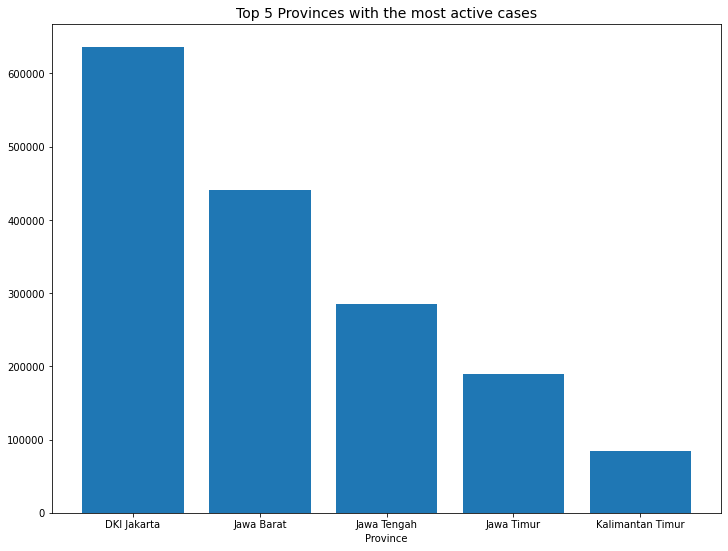

In [ ]:
'''
Menampilkan 5 kota teratas dengan jumlah kasus positif tertinggi di Indonesia. 
Nilai yang digunakan adalah nilai dari kolom location yang akan di urutkan berdasarkan kolom total_cases dan akan diambil 5 nilai teratas.
Untuk memviasualisasikan data dapat menggunakan library maplotlib yang sudah di import sebelumnya. 
'''

plt.figure(figsize=(12,9))
plt.bar(data1[data1.location != 'Indonesia'].sort_values(by=['total_cases'], ascending=False)['location'].values[:5], 
        data1[data1.location != 'Indonesia'].sort_values(by=['total_cases'], ascending=False)['total_cases'].values[:5])
plt.title('Top 5 Provinces with the most active cases', fontsize=14)
plt.xlabel('Province')
plt.show()

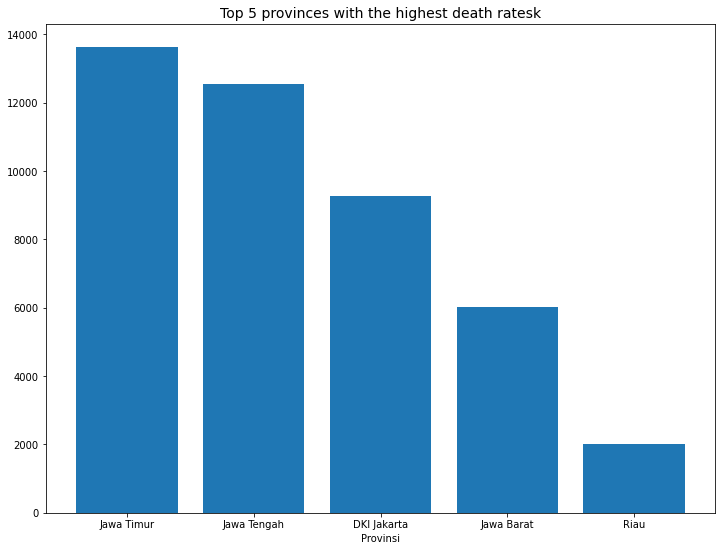

In [ ]:
'''
Menampilkan 5 kota teratas dengan jumlah kasus kematian tertinggi di Indonesia. 
Nilai yang digunakan adalah nilai dari kolom location yang akan di urutkan berdasarkan kolom total_deaths dan akan diambil 5 nilai teratas.
Untuk memviasualisasikan data dapat menggunakan library maplotlib yang sudah di import sebelumnya. 
'''

plt.figure(figsize=(12,9))
plt.bar(data1[data1.location != 'Indonesia'].sort_values(by=['total_deaths'], ascending=False)['location'].values[:5], 
        data1[data1.location != 'Indonesia'].sort_values(by=['total_deaths'], ascending=False)['total_deaths'].values[:5])
plt.title('Top 5 provinces with the highest death ratesk', fontsize=14)
plt.xlabel('Provinsi')
plt.show()

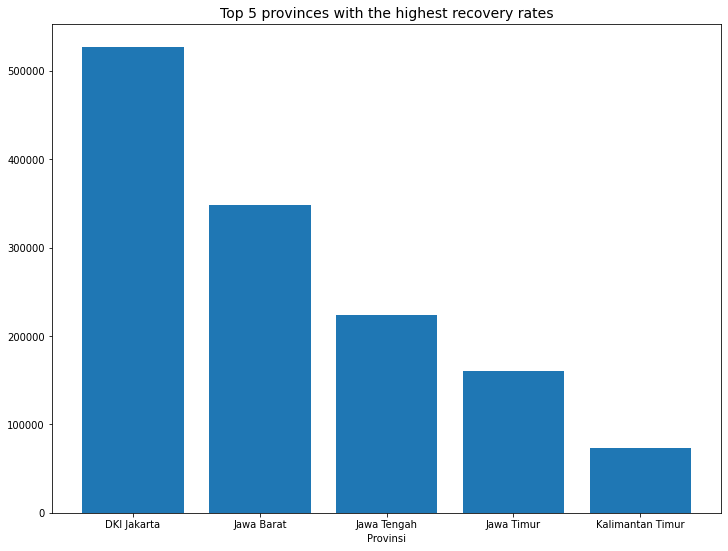

In [ ]:
'''
Menampilkan 5 kota teratas dengan jumlah kesembuhan tertinggi di Indonesia. 
Nilai yang digunakan adalah nilai dari kolom location yang akan di urutkan berdasarkan kolom total_recovered dan akan diambil 5 nilai teratas.
Untuk memviasualisasikan data dapat menggunakan library maplotlib yang sudah di import sebelumnya. 
'''

plt.figure(figsize=(12,9))
plt.bar(data1[data1.location != 'Indonesia'].sort_values(by=['total_recovered'], ascending=False)['location'].values[:5], 
        data1[data1.location != 'Indonesia'].sort_values(by=['total_recovered'], ascending=False)['total_recovered'].values[:5])
plt.title('Top 5 provinces with the highest recovery rates', fontsize=14)
plt.xlabel('Provinsi')
plt.show()

#Modeling

In [ ]:
#Membuat dataframe baru dengan location = Jawa Timur

jatim = data[data.location == 'Jawa Timur']
jatim

,date,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,Area_km2,population,population_density,longitude,latitude
0,2020-01-08,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,2020-01-09,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,2020-01-10,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,2020-01-11,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,2020-01-12,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16123,2021-07-05,Jawa Timur,1543,99,915,529,180268,13025,155156,12087,Province,47803,40479023,846.78,112.732941,-7.723346
16157,2021-07-06,Jawa Timur,1808,122,1077,609,182076,13147,156233,12696,Province,47803,40479023,846.78,112.732941,-7.723346
16191,2021-07-07,Jawa Timur,2548,155,1045,1348,184624,13302,157278,14044,Province,47803,40479023,846.78,112.732941,-7.723346
16225,2021-07-08,Jawa Timur,2551,165,1291,1095,187175,13467,158569,15139,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
#melihat informasi mengenai dataframe jatim

jatim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 16259
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                549 non-null    datetime64[ns]
 1   location            549 non-null    object        
 2   new_cases           549 non-null    int64         
 3   new_deaths          549 non-null    int64         
 4   new_recovered       549 non-null    int64         
 5   new_active_cases    549 non-null    int64         
 6   total_cases         549 non-null    int64         
 7   total_deaths        549 non-null    int64         
 8   total_recovered     549 non-null    int64         
 9   total_active_cases  549 non-null    int64         
 10  location_level      549 non-null    object        
 11  Area_km2            549 non-null    int64         
 12  population          549 non-null    int64         
 13  population_density  549 non-null    float64     

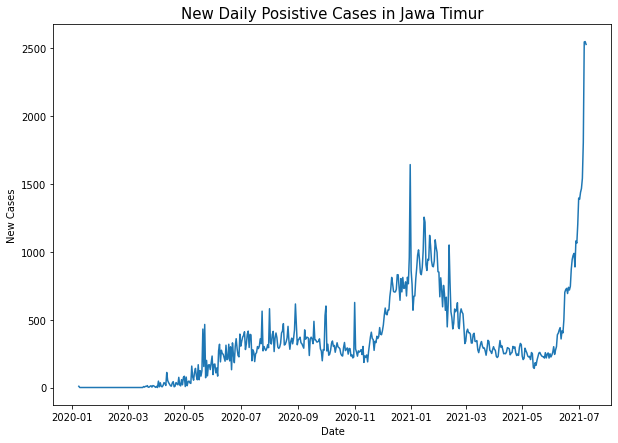

In [ ]:
#Membuat linechart dengan matplotlib untuk melihat jumlah kasus positif di Jatim dari bulan januari 2020 hingga bulan juli 2021. 

plt.figure(figsize=(10,7))
plt.plot(jatim['date'].values ,jatim['new_cases'].values)
plt.title('New Daily Posistive Cases in Jawa Timur', fontsize=15)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


In [ ]:
#Menginisialisasi kan nilai X dan y, dimana X adalah nilai dari kolom date dan y adalah nilai dari kolom new_cases

X = jatim['date'].values
y = jatim['new_cases'].values

In [ ]:
#melakukan scaling pada y menggunakan minmax scaling

from sklearn import preprocessing
 
y = preprocessing.minmax_scale(y)
y

array([3.52802822e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

##Train Test Split

In [ ]:
#Membagi dataset menjadi data train dan data test, dimana data test sebanyak 20% dari keseluruhan data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=False) 

In [ ]:
'''
Membuat fungsi untuk merubah format data menjadi format yang dapat diterima oleh model. 
Fungsi ini menerima sebuah atribut yang telah dikonversi menjad tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch.
'''

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

##LSTM 

In [ ]:
'''
Memodelkan data dengan LSTM model. Disini menggunakan 2 layer LSTM dengan 60 neuron dimana salah satunya harus terdapat parameter return_sequence yang bernilai True.
Terdapat 2 hidden layer dengan 30 neuron dan fungsi aktivasi ReLU dan juga 1 neuron pada output layer. Dalam pemodelan ini, ditambahkan juga dropout dengan rate 0.05 dan 0.2.
'''

import tensorflow as tf

train_set = windowed_dataset(y_train, window_size=15, batch_size=32, shuffle_buffer=1000)
test_set = windowed_dataset(y_test, window_size=60, batch_size=32, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dropout(rate=0.05),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1),
])

###Compile Model

In [ ]:
'''
Compile model dengan fungsi compile dari sequential(). Didalamnya terdapat parameter loss, optimizer dan metrics. 
Loss berisi fungi loss yang digunakan, disini menggunakan loss function Huber.
Optimizer yang digunakan adalah Adam dengan learning rate = 1.0000e-04.
Metrics merupakan metriks yang digunakan saat evaluasi model, disini menggunakan mae (mean absolute error)
'''

optimizer = tf.keras.optimizers.Adam(lr=1.0000e-04)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


###Callbacks

In [ ]:
#Membuat fungsi callbacks dari keras

class my_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.1):
            print("MAE has reached below 10%")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_callback()

In [ ]:
#fit model dengan epoch sebanyak 50 kali. Pada epoch ke-50 menghasilkan nilai train mae sebesar 0.0287 dan validation mae sebesar 0.0971

history = model.fit(train_set, epochs = 50, validation_data = test_set, callbacks = callbacks)

Epoch 1/50
14/14 [==============================] - 5s 93ms/step - loss: 0.0129 - mae: 0.1202 - val_loss: 0.0635 - val_mae: 0.2673
Epoch 2/50
14/14 [==============================] - 0s 21ms/step - loss: 0.0102 - mae: 0.1062 - val_loss: 0.0551 - val_mae: 0.2417
Epoch 3/50
14/14 [==============================] - 0s 21ms/step - loss: 0.0082 - mae: 0.0947 - val_loss: 0.0463 - val_mae: 0.2109
MAE has reached below 10%
Epoch 4/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0062 - mae: 0.0807 - val_loss: 0.0364 - val_mae: 0.1728
MAE has reached below 10%
Epoch 5/50
14/14 [==============================] - 0s 21ms/step - loss: 0.0041 - mae: 0.0664 - val_loss: 0.0256 - val_mae: 0.1459
MAE has reached below 10%
Epoch 6/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0031 - mae: 0.0598 - val_loss: 0.0173 - val_mae: 0.1276
MAE has reached below 10%
Epoch 7/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0035 - mae: 0.0658 - val_loss: 0.01

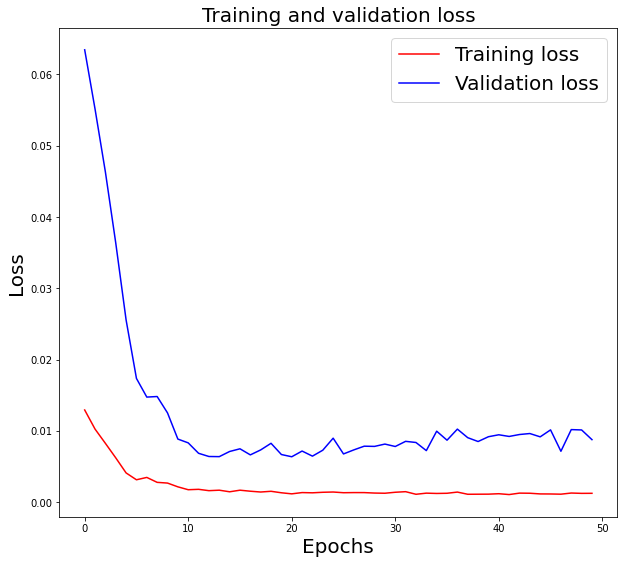

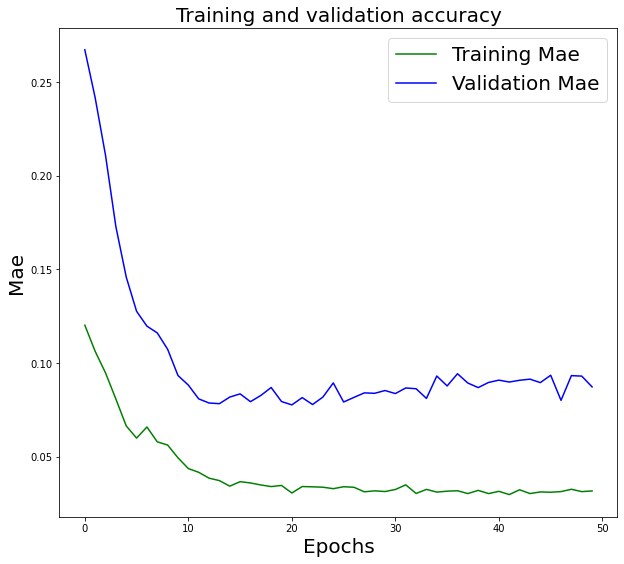

In [ ]:
#Membuat visualisasi dari hasil evaluasi yang didapatkan sebelumnya agar lebih mudah terbaca

history_dict = history.history

mae = history_dict['mae']
val_mae = history_dict['val_mae']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(10,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(10,9))
plt.plot(epochs, mae, 'g', label='Training Mae')
plt.plot(epochs, val_mae, 'b', label='Validation Mae')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Mae', size=20)
plt.legend(prop={'size': 20})
plt.show()

###Predict

In [ ]:
#Memprediksi kasus positif covid-19 dengan fungsi predict

pred = model.predict(test_set)
pred

array([[0.2498893 ],
       [0.35025656],
       [0.12434425],
       [0.12611862],
       [0.12344404],
       [0.3923181 ],
       [0.22357276],
       [0.5690292 ],
       [0.12216561],
       [0.6157507 ],
       [0.15487318],
       [0.12193109],
       [0.2111642 ],
       [0.12101775],
       [0.12129404],
       [0.12120245],
       [0.1225128 ],
       [0.12965725],
       [0.18758486],
       [0.44222617],
       [0.2979399 ],
       [0.13274843],
       [0.49734738],
       [0.36993787],
       [0.12741435],
       [0.14121763],
       [0.12275021],
       [0.1989958 ],
       [0.28100193],
       [0.12300909],
       [0.12141801],
       [0.23619416],
       [0.16017543],
       [0.17687331],
       [0.1211795 ],
       [0.41647238],
       [0.12111859],
       [0.5286285 ],
       [0.16760975],
       [0.12127024],
       [0.469165  ],
       [0.13666247],
       [0.12152623],
       [0.2648851 ],
       [0.31438416],
       [0.15025097],
       [0.12514985],
       [0.145

In [ ]:
#Reshape hasil prediksi

pred = np.reshape(pred, (pred.shape[0]))

In [ ]:
#Membuat dataframe baru yang menampung nilai actual dan nilai prediksi

y_test = pd.Series(y_test, name='actual')
pred = pd.Series(pred, name='predicted')
df_baru = pd.concat([y_test,pred], axis=1)
df_baru.head()

,actual,predicted
0,0.105841,0.249889
1,0.093297,0.350257
2,0.113289,0.124344
3,0.136417,0.126119
4,0.133281,0.123444


In [ ]:
#import library prophet dari fbprophet yang digunakan untuk forecast. 
from fbprophet import Prophet

#mengelompokan kolom date dan new_cases dalam jatim_new
jatim_new = jatim.groupby('date').sum()['new_cases'].reset_index()

In [ ]:
#mengganti nama kolom, date menjadi ds, new_cases menjadi y
jatim_new.columns = ['ds','y']

#mengganti tipe data ds menjadi datetime
jatim_new['ds'] = pd.to_datetime(jatim_new['ds'])
jatim_new

,ds,y
0,2020-01-08,9
1,2020-01-09,0
2,2020-01-10,0
3,2020-01-11,0
4,2020-01-12,0
...,...,...
544,2021-07-05,1543
545,2021-07-06,1808
546,2021-07-07,2548
547,2021-07-08,2551


In [ ]:
#mendifinisikan model dengan interval width 0.90 

model = Prophet(interval_width=0.90) 

#fit model
model.fit(jatim_new) 

#membuat dataframe baru untuk prediksi kedepannya
future = model.make_future_dataframe(periods=1000)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#membuat prediksi
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1544,2024-03-31,1718.048328,299.167822,3018.320838
1545,2024-04-01,1716.857323,327.043205,3089.470865
1546,2024-04-02,1733.935005,338.486972,3047.094007
1547,2024-04-03,1772.662043,418.879774,3085.394983
1548,2024-04-04,1799.285819,394.615624,3208.293764


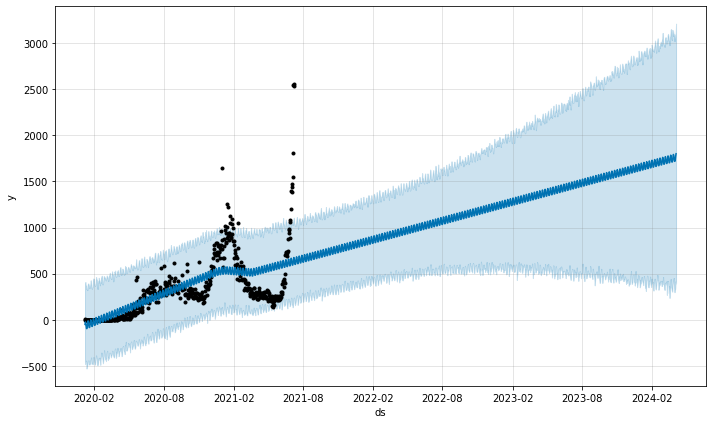

In [ ]:
#membuat plot dari hasil prediksi

forecast_plot = model.plot(forecast)

In [ ]:
#forecastnew = forecast['ds']
#forecastnew2 = forecast['yhat']

#forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

#mask = (forecastnew['ds'] > "2021-07-10") & (forecastnew['ds'] <= "2024-04-04")
#forecastedvalues = forecastnew.loc[mask]

#mask = (forecastnew['ds'] > "2020-01-08") & (forecastnew['ds'] <= "2021-07-09")
#forecastnew = forecastnew.loc[mask]

In [ ]:
#fig, ax1 = plt.subplots(figsize=(16, 8))
#ax1.plot(forecastnew.set_index('ds'), color='red')
#ax1.plot(forecastedvalues.set_index('ds'), color='pink')
#ax1.set_ylabel('Covid-19 New Cases')
#ax1.set_xlabel('Date')
#print("Red = Predicted Values, Blue = Base Values")